# 🛒 Walmart Sales Forecasting

This notebook explores and analyzes weekly sales data from Walmart stores across the country.

## 📌 Objective

- Understand trends, seasonality, and patterns in weekly sales
- Analyze the impact of external factors like temperature, fuel price, CPI, and unemployment
- Identify top/worst performing stores
- Prepare the data for forecasting sales for the next 12 weeks

📅 Data covers multiple stores over time with weekly granularity.



************************************************************************

### Importing libraries

In [437]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Loading the data

In [438]:
df = pd.read_csv('Walmart.csv')
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667


In [439]:
df.info() #getting an overview of columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


### Converting to datetime keeping the DD-MM-YYYY format and sorting the dataset by the Date colun

In [440]:
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)
df.sort_values("Date",inplace=True)

In [441]:
df.isnull().sum() #checking for missing values

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

### Checking for outliers

<Axes: >

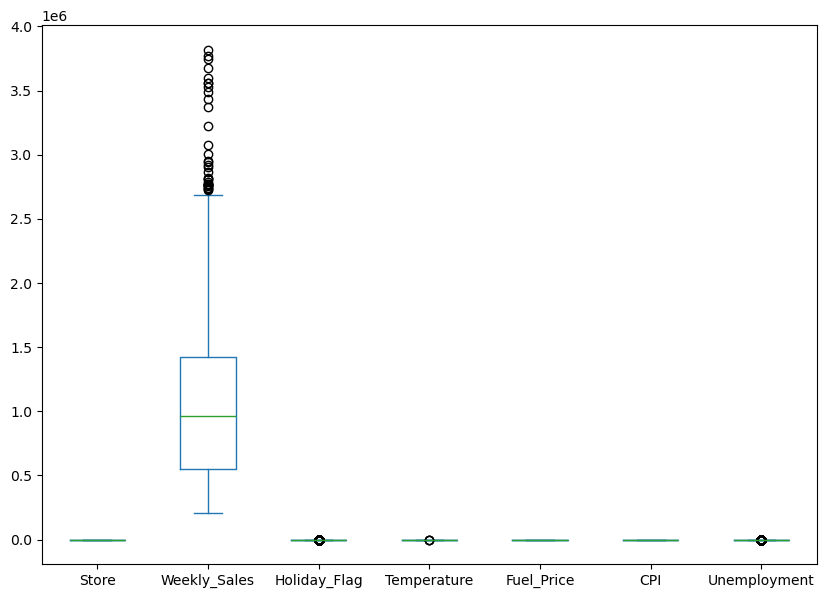

In [442]:
df.plot(kind='box', figsize=(10,7))

### Using IQR method to filter outliers of selected columns


In [443]:
for col in ['Weekly_Sales', 'Temperature']:
    q1 = df[col].quantile(0.25)  
    q3 = df[col].quantile(0.75)  
    iqr = q3 - q1                
    ul = q3 + 1.5 * iqr          
    ll = q1 - 1.5 * iqr          
    df = df[(df[col] >= ll) & (df[col] <= ul)]  

### Visualising distribution for the target column

In [444]:
df.duplicated().sum() #checking for duplicate rows

0

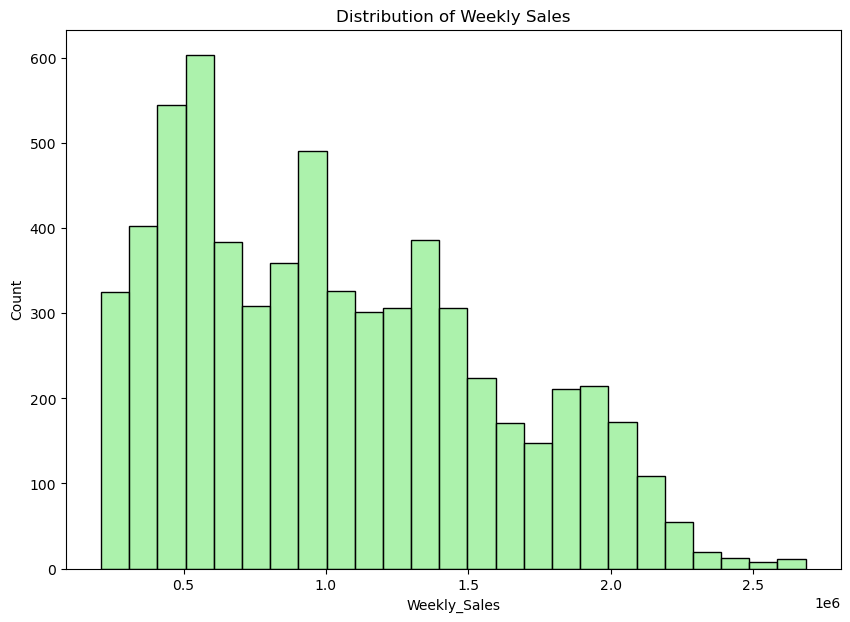

In [445]:
plt.figure(figsize=(10,7))
sns.histplot(df['Weekly_Sales'], bins=25, color='lightgreen')
plt.title('Distribution of Weekly Sales')
plt.show()

### Does Unemployment affect Weekly Sales?

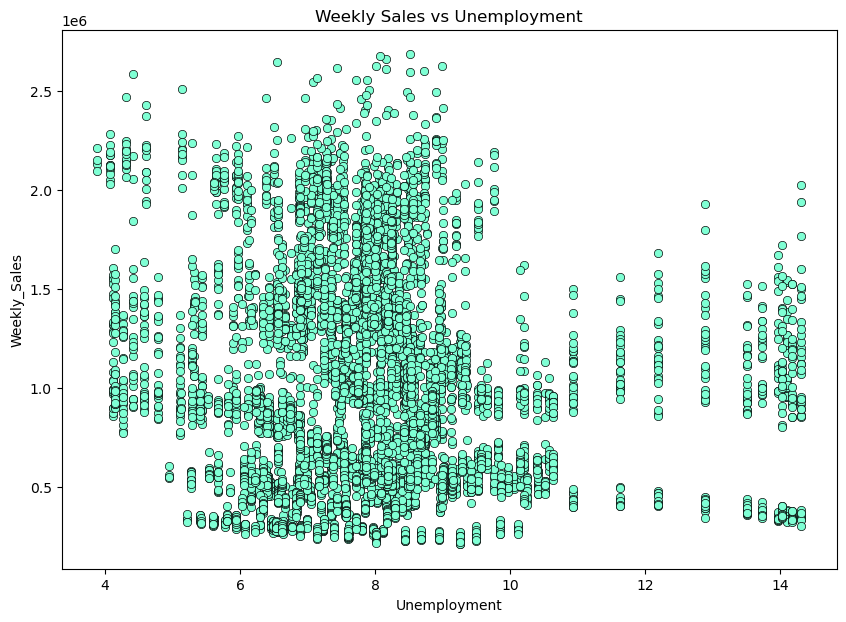

In [446]:
plt.figure(figsize=(10,7))
sns.scatterplot(data=df, x='Unemployment', y='Weekly_Sales', color='aquamarine', edgecolor='black')
plt.title('Weekly Sales vs Unemployment')
plt.show()

- There does NOT seem to be a significant correlation between Weekly Sales and Unemployment rate 


*************************

### If the weekly sales show a seasonal trend, when and what could be the reason?

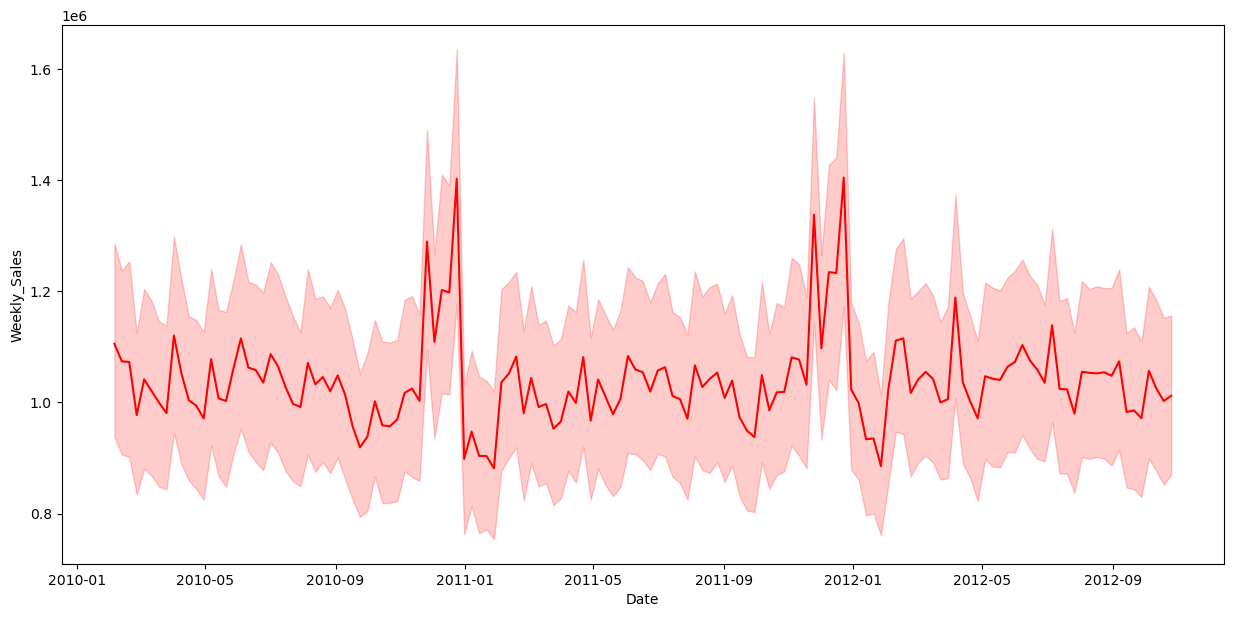

In [447]:
plt.figure(figsize=(15,7))
sns.lineplot(data=df, x='Date', y='Weekly_Sales', color='red')
plt.show()

- A seasonal trend can be observed every year during the last quarter. 
- The cause of these spikes in the sales could be the festivals and holidays like Halloween, Christmas, New Year, Thanksgiving, Black Friday etc whhich are celebrated in the near the of the year.
- The customers spend on gifts and celebration items for these festivals thus causing surges in sales.

***************************************

### Does temperature affect the weekly sales in any manner?

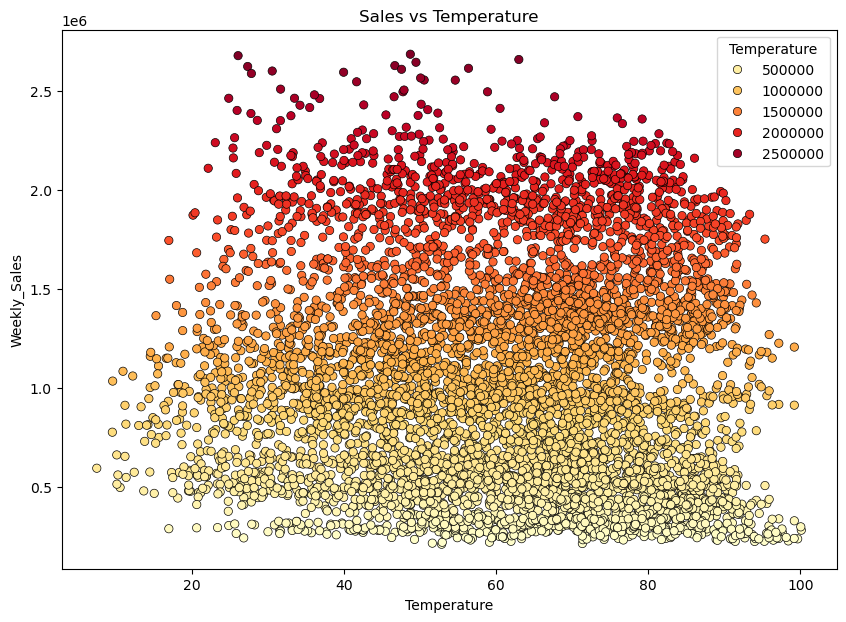

In [448]:
plt.figure(figsize=(10, 7))
sns.scatterplot(data=df, x='Temperature', y='Weekly_Sales', hue='Weekly_Sales', palette='YlOrRd', edgecolor='black')
plt.title('Sales vs Temperature')
plt.legend(title='Temperature')
plt.show()


- Nothing of significance can be observed 

*********************


### How is the Consumer Price index affecting the weekly sales of various stores?



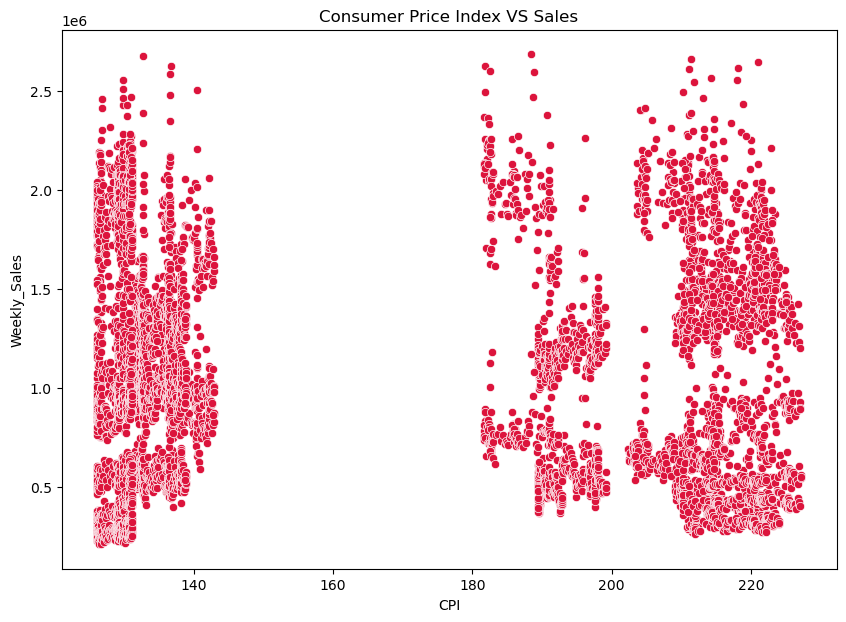

In [449]:
plt.figure(figsize=(10,7))
sns.scatterplot(data=df, x='CPI', y='Weekly_Sales', color='crimson')
plt.title('Consumer Price Index VS Sales')
plt.show()

- Still NO strong correlation or any relationship between these features

************

### Top performing stores according to the historical data.

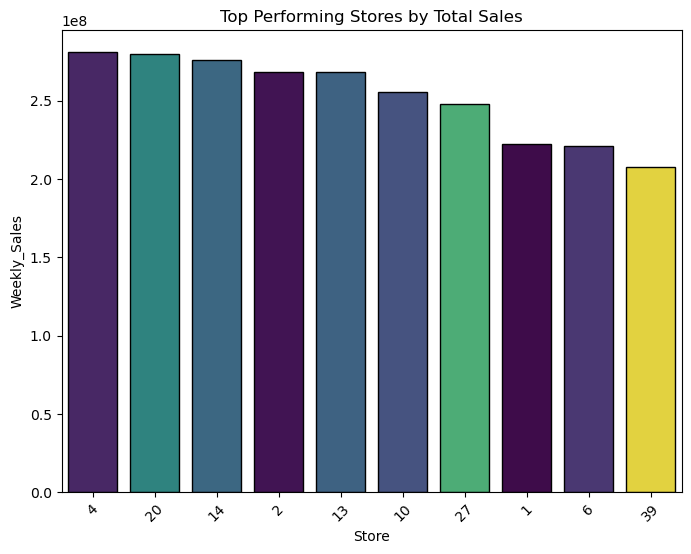

In [450]:
top_stores = df.groupby('Store')['Weekly_Sales'].sum().nlargest(10).reset_index()
plt.figure(figsize=(8,6))
sns.barplot(data=top_stores,
            x='Store',
            y='Weekly_Sales', 
            hue='Store', 
            palette='viridis', 
            order=top_stores['Store'], 
            legend=False,
            edgecolor='black')
plt.title('Top Performing Stores by Total Sales')
plt.xticks(rotation=45)
plt.show()


****

### The worst performing store, and how significant is the difference between the highest and lowest performing stores.

In [451]:
best_worst = df.groupby('Store')['Weekly_Sales'].sum()
best = best_worst.idxmax()
worst = best_worst.idxmin()
best_worst = best_worst.loc[[best, worst]].reset_index()

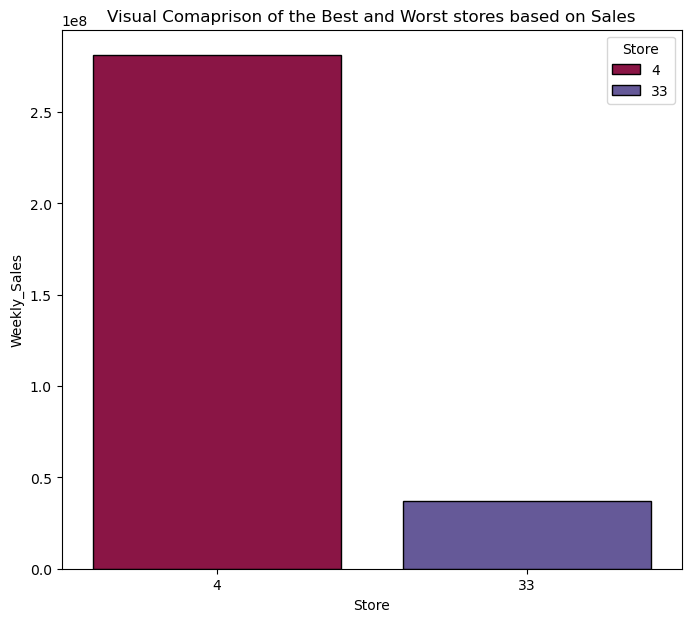

Difference between the Total Sales of THE BEST and THE WORST is:  243875002.96


In [452]:
plt.figure(figsize=(8,7))
sns.barplot(data=best_worst, 
            x='Store', 
            y='Weekly_Sales', 
            hue='Store', 
            palette='Spectral',
            edgecolor='black')
plt.title('Visual Comaprison of the Best and Worst stores based on Sales')
plt.show()
print('Difference between the Total Sales of THE BEST and THE WORST is: ',best_worst.iloc[0, 1] - best_worst.iloc[1,1] )

- Store number 4 is the BEST store on the basis of Sales with Total Sales of $2.810352e+08
- Store number 33 is the WORST store on the basis of Sales with Total Sales of $3.716022e+07
- The difference between their Total Sales is of $243875002.96

*****


## Start of Model Building Phase

- We have stores numbered from 1-45.
- We'll focus on forecast of  sales one of these stores.
- I will choose store number 31 because I was born on 31st July (no rule says I cant do that😶‍🌫️).

In [453]:
df31 = df[df['Store'] == 31]
df31

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
4290,31,2010-02-05,1469252.05,0,39.05,2.572,210.752605,8.324
4291,31,2010-02-12,1543947.23,1,37.77,2.548,210.897994,8.324
4292,31,2010-02-19,1473386.75,0,39.75,2.514,210.945160,8.324
4293,31,2010-02-26,1344354.41,0,45.31,2.561,210.975957,8.324
4294,31,2010-03-05,1384870.51,0,48.61,2.625,211.006754,8.324
...,...,...,...,...,...,...,...,...
4428,31,2012-09-28,1279080.58,0,80.38,3.666,222.616433,6.565
4429,31,2012-10-05,1363365.05,0,70.28,3.617,222.815930,6.170
4430,31,2012-10-12,1401113.42,0,61.53,3.601,223.015426,6.170
4431,31,2012-10-19,1378730.45,0,68.52,3.594,223.059808,6.170


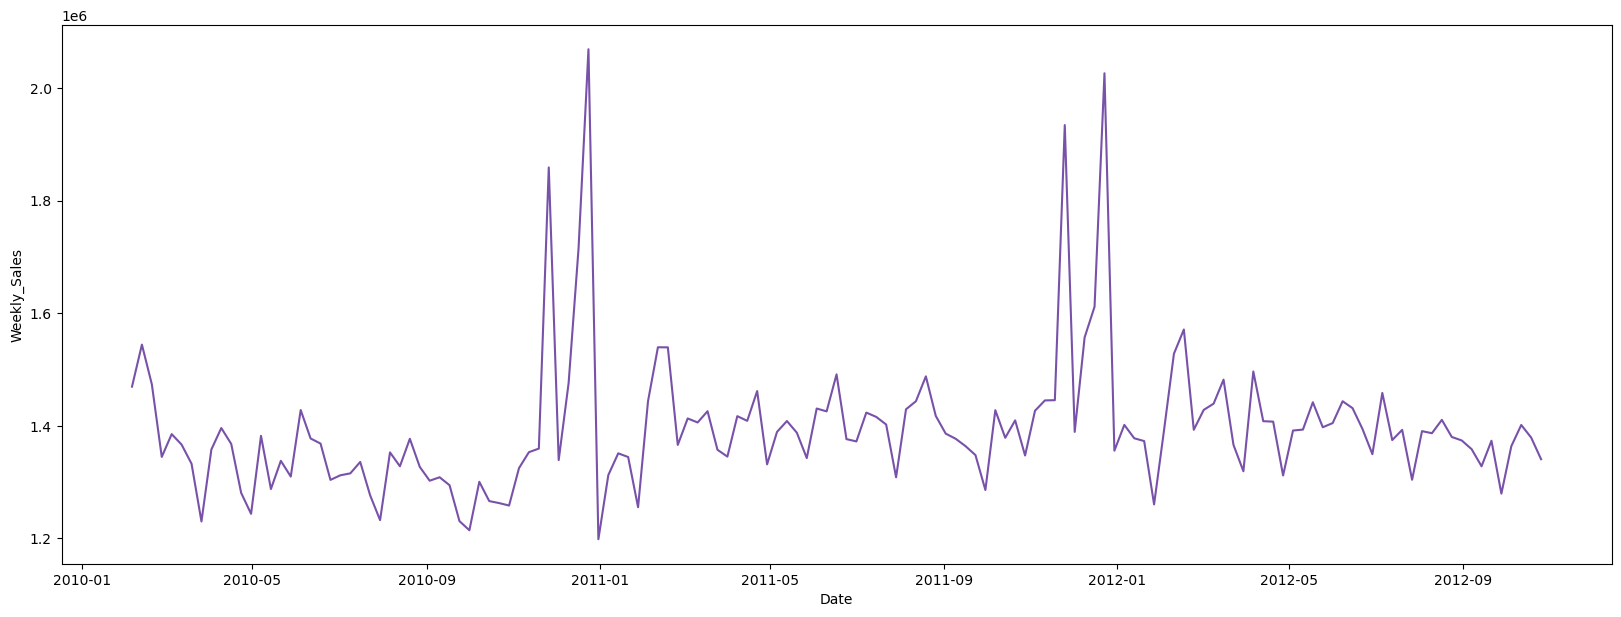

In [454]:
plt.figure(figsize=(20,7))
sns.lineplot(data=df31, x='Date', y='Weekly_Sales', color='#7851a9')
plt.show()

- Visually,  seasonal peaks can be seen but NO trend can be observed 

In [455]:
from statsmodels.tsa.stattools import adfuller
p = adfuller(df31['Weekly_Sales'].dropna())
if p[1] >= 0.05:
    print(p[1])
    print('non-stationary')
else:
    print(p[1])
    print('data is stationary')

0.00030604587619859487
data is stationary


- p < 0.05 → stationary 
- p >= 0.05 → not stationary (will need tansformation)

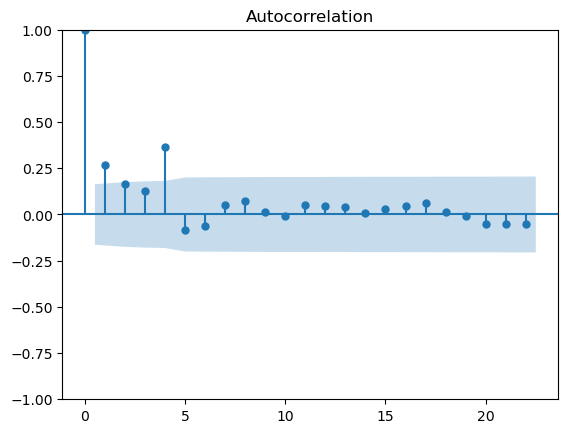

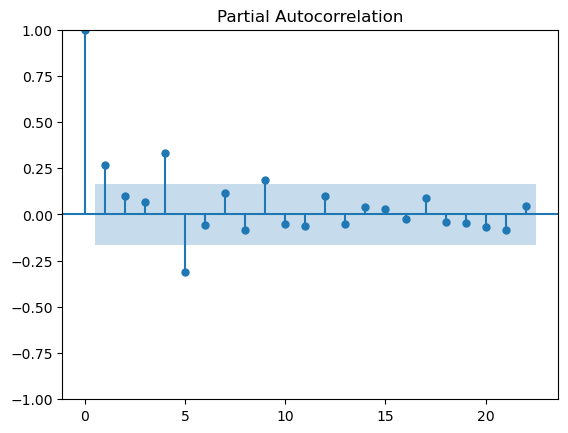

In [456]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(df31['Weekly_Sales'])
plot_pacf(df31['Weekly_Sales'])
plt.show()

- The lag 1 and 5 seems significant. Mix of significant and non-significant spikes indicate some long term manner and seasonality.
- We will not stress over exact numbers and just do guess work
- k = 5, p = 5, d = 0, s (seson length) = 52 as the data is weekly
- We'll test ARMA and SARIMA to see which works the best (it seems much likely that SARIMA will perform the best as there are seasonal spikes)
- We are not training ARIMA as the data was already stationary and didnt require differening

In [457]:
train = df31.iloc[:-12].set_index('Date')
test = df31.iloc[-12:].set_index('Date')

### 1. ARMA model

In [458]:
from statsmodels.tsa.arima.model import ARIMA
arma = ARIMA(train['Weekly_Sales'], order=(5,0,5))
arma = arma.fit()
pred_arma = arma.forecast(steps=len(test['Weekly_Sales']))
print(arma.aic)
print(arma.bic)

c:\Users\rehan\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
c:\Users\rehan\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
c:\Users\rehan\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)


3431.5350731213216
3466.0374409997353


c:\Users\rehan\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


###  2. SARIMA model

#### I tried p=5 and q=5 but SARIMA took like 11 mins to train because the parameters were too large. And even after that the results showed negligible difference compared to p=1 and q=1. so I'm using p=1 and q=1 for SARIMA

In [459]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
sarima = SARIMAX(train['Weekly_Sales'], order=(1,0,1), seasonal_order=(1, 0, 1, 52) )
sarima = sarima.fit()
pred_sarima = sarima.forecast(steps=len(test['Weekly_Sales']))
print(sarima.aic)
print(sarima.bic)

c:\Users\rehan\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
c:\Users\rehan\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
c:\Users\rehan\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


3431.180106884942
3445.5560935009476


In [460]:
from sklearn.metrics import root_mean_squared_error
rmse_arma = root_mean_squared_error(test['Weekly_Sales'], pred_arma)
rmse_sarima = root_mean_squared_error(test['Weekly_Sales'], pred_sarima)
print(rmse_arma)
print(rmse_sarima)

48820.84260978442
22595.192515988365


In [461]:
arma_full = pd.concat([
    train['Weekly_Sales'],  
    pd.Series(pred_arma, index=test.index)])

sarima_full = pd.concat([
    train['Weekly_Sales'],
    pd.Series(pred_sarima, index=test.index)])

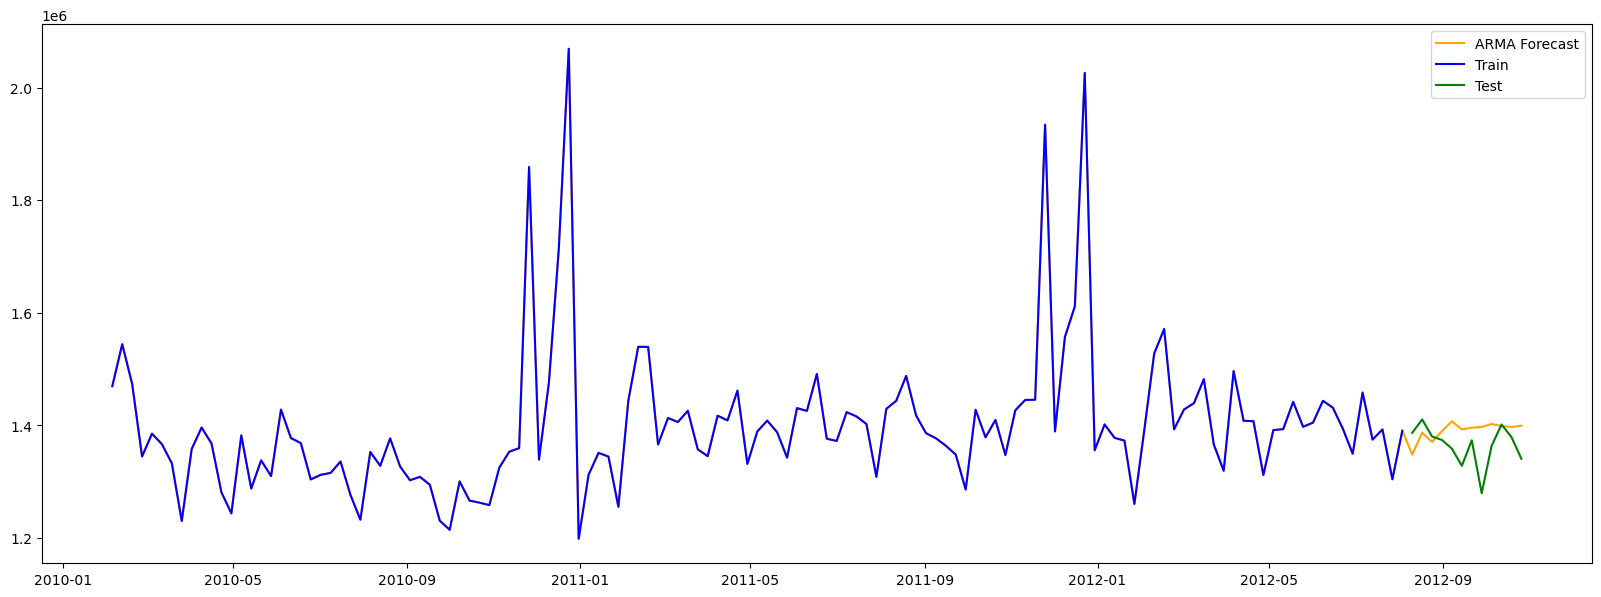

In [462]:
plt.figure(figsize=(20,7))
plt.plot(arma_full.index, arma_full, label='ARMA Forecast', color='orange')
plt.plot(train.index, train['Weekly_Sales'], label='Train', color='blue')
plt.plot(test.index, test['Weekly_Sales'], label='Test', color='green')
plt.legend()
plt.show()

- NOT looking so good

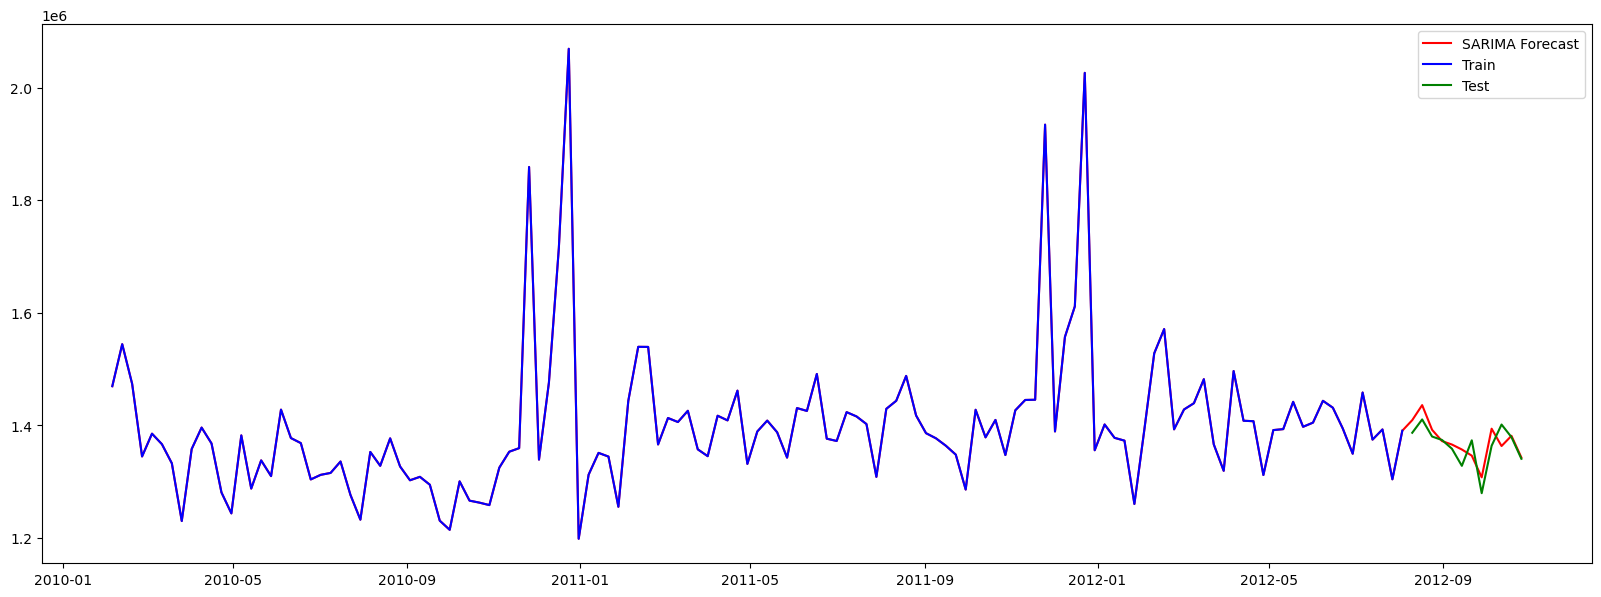

In [463]:
plt.figure(figsize=(20,7))
plt.plot(sarima_full.index, sarima_full, label='SARIMA Forecast', color='red')
plt.plot(train.index, train['Weekly_Sales'], label='Train', color='blue')
plt.plot(test.index, test['Weekly_Sales'], label='Test', color='green')
plt.legend()
plt.show()

- SARIMA seems to be performing well because it works excellently with heavily seasonal data

## UNTIL WE MEET AGAIN...

will later do a bonus model and annotate the file with comments and stuff